<a href="https://colab.research.google.com/github/zarandonlautaro/convolutional-neural-networks/blob/main/training-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalación de librerías
!pip install keras
!pip install tensorflow

In [ ]:
# clonamamos el dataset del repositorio
!git clone https://github.com/zarandonlautaro/convolutional-neural-networks.git dataset

Cloning into 'dataset'...
remote: Enumerating objects: 14, done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 14
Receiving objects: 100% (14/14), 43.54 MiB | 25.51 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
# Descomprimimos el dataset en la carpeta content
!unrar x -Y "/content/dataset/dataset-face-expression-recogition.rar" "/content/"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Extracting  /content/images/validation/fear/9101.jpg                      86%  OK 
Extracting  /content/images/validation/fear/911.jpg                       86%  OK 
Extracting  /content/images/validation/fear/9179.jpg                      86%  OK 
Extracting  /content/images/validation/fear/9205.jpg                      86%  OK 
Extracting  /content/images/validation/fear/9232.jpg                      86%  OK 
Extracting  /content/images/validation/fear/9251.jpg                      86%  OK 
Extracting  /content/images/validation/fear/9261.jpg                      86%  OK 
Extracting  /content/images/validation/fear/9281.jpg                      86%  OK 
Extracting  /content/images/validation/fear/9302.jpg                      86%  OK 
Extracting  /content/images/validation/fear/9333.jpg                      86%  OK 
Extracting  /

In [ ]:
# Definimos las rutas del dataset
train_data_dir = '/content/images/train'
val_data_dir = '/content/images/validation'

In [ ]:
# Definimos algunos parámetro importantes como: tamaño de imagenes, número de clases, etiquetas de las clases, número de epocas, batch size. Finalmente configuramos el dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Definimos algunos parámetros importantes
width_shape = 48
height_shape = 48
num_classes = 7
epochs = 50
batch_size = 32
class_names = ['angry','disgust','fear','happy','neutral','sad','surprise']

# Configuramos el dataset de entrenamiento y validación
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=True)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
# Definimos la arquitectura del modelo CNN

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

## Extracción de Características
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (width_shape,height_shape,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

## Clasificación
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Revisamos el modelo CNN
model.summary()

# Compilamos y estamos listos para el entrenamiento
opt = Adam(learning_rate=1e-4, decay=1e-4 / epochs)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        5

In [ ]:
# Configuración Tensorboard
from tensorflow.keras.callbacks import TensorBoard
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)


In [ ]:
# Entrenamiento de la red
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=train_generator.n//batch_size,
    validation_steps=val_generator.n//batch_size,
    callbacks=[tensorboard_callback])

Epoch 1/50
900/900 [==============================] - 28s 21ms/step - loss: 1.9835 - accuracy: 0.2194 - val_loss: 1.7543 - val_accuracy: 0.2913
Epoch 2/50
900/900 [==============================] - 20s 22ms/step - loss: 1.8239 - accuracy: 0.2787 - val_loss: 1.7065 - val_accuracy: 0.3192
Epoch 3/50
900/900 [==============================] - 17s 19ms/step - loss: 1.7001 - accuracy: 0.3336 - val_loss: 1.5541 - val_accuracy: 0.4013
Epoch 4/50
900/900 [==============================] - 17s 19ms/step - loss: 1.6231 - accuracy: 0.3694 - val_loss: 1.5068 - val_accuracy: 0.4290
Epoch 5/50
900/900 [==============================] - 18s 20ms/step - loss: 1.5567 - accuracy: 0.3998 - val_loss: 1.4362 - val_accuracy: 0.4558
Epoch 6/50
900/900 [==============================] - 18s 19ms/step - loss: 1.5027 - accuracy: 0.4194 - val_loss: 1.4161 - val_accuracy: 0.4584
Epoch 7/50
900/900 [==============================] - 18s 20ms/step - loss: 1.4456 - accuracy: 0.4409 - val_loss: 1.3145 - val_accuracy:

In [ ]:
# curvas de entrenamiento
!tensorboard --logdir logs


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.14.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [ ]:
# grabamos el modelo
model.save("model-expression-recognition.h5")

angry


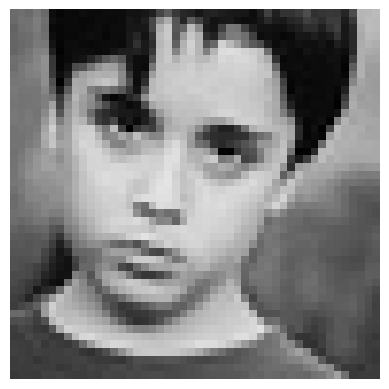

In [ ]:
# probamos el modelo
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

faces = []

# Cargamos una imagen del directorio
imaget_path = "/content/images/validation/neutral/9993.jpg"

# Redimensionamos la imagen y convertimos a gray
face = cv2.cvtColor(cv2.imread(imaget_path), cv2.COLOR_BGR2GRAY)
face = cv2.resize(face, (48, 48))
face2 = img_to_array(face)
face2 = np.expand_dims(face2,axis=0)

faces.append(face2)

# El modelo estima la predicción
preds = model.predict(faces)

print(class_names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(face),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 7066 images belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       angry     0.1360    0.9990    0.2395       960
     disgust     0.0000    0.0000    0.0000       111
        fear     0.0000    0.0000    0.0000      1018
       happy     0.0000    0.0000    0.0000      1825
     neutral     0.0000    0.0000    0.0000      1216
         sad     0.0000    0.0000    0.0000      1139
    surprise     0.0833    0.0013    0.0025       797

    accuracy                         0.1359      7066
   macro avg     0.0313    0.1429    0.0346      7066
weighted avg     0.0279    0.1359    0.0328      7066



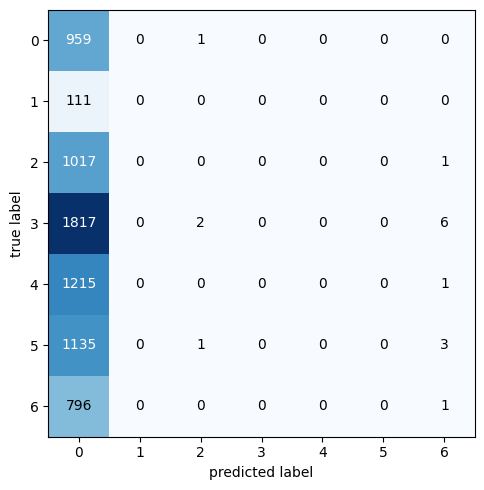

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np

# Configuración del dataset de validación sin shuffle
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=False)

predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = val_generator.classes

matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(5,5), show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4,target_names=class_names))